## Codio Activity 7.5: Calculating Multiple Loss Functions

**Expected Time = 60 minutes**

**Total Points = 20**

A third loss function mentioned is the Huber loss function.  This is notable for its resistance to extreme values and is defined as a piecewise function:


$${\displaystyle L_{\delta }(y,f(x))={\begin{cases}{\frac {1}{2}}(y-f(x))^{2}&{\textrm {for}}|y-f(x)|\leq \delta ,\\\delta \,(|y-f(x)|-{\frac {1}{2}}\delta ),&{\textrm {otherwise.}}\end{cases}}}$$

In this activity, you will compute and compare the results of minimizing the mean squared error, mean absolute error, and huber loss functions.  

NOTE: If the formula is not rendering correctly (overlapping text), double-click in this cell and then Shift-Enter to reload the cell.


## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)

In [53]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import scipy.optimize
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error

### The tips data

For this exercise, the tips dataset from the lectures will be used, and you are to predict the tip amount given the total bill.  

In [23]:
tips = sns.load_dataset('tips')

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
X = tips['total_bill']
y = tips['tip']

[Back to top](#Index:) 

## Problem 1

### Create a Huber Loss function

**10 Points**

Using the formula repeated below for the Huber loss, complete the function that returns the sum of the Huber Loss equation.

$${\displaystyle L_{\delta }(y,f(x))={\begin{cases}{\frac {1}{2}}(y-f(x))^{2}&{\textrm {for}}|y-f(x)|\leq \delta ,\\\delta \,(|y-f(x)|-{\frac {1}{2}}\delta ),&{\textrm {otherwise.}}\end{cases}}}$$

Your function will take in both a value for $\theta$ and for $\delta$.  Set the value of $\delta = 1.5$ by default.

In [26]:
#GRADED

def huber_loss(theta, delta):
    """
    This function accepts a value for theta
    and returns the sum of the huber loss.
    
    Arguments
    ---------
    theta: float
           Values to use for parameter
           of regression model.
           
    delta: float
           Value for delta in Huber Loss
            
    Returns
    -------
    huber: np.float
         Sum of huber loss
    """

# YOUR CODE HERE
def huber_loss(theta, delta = 1.5):
    y_predicted = theta * X
    y_error = np.abs(y - y_predicted)
    return sum(np.where(y_error <= delta, ((y_error)**2)/2, delta * (y_error - (delta / 2))))
   

huber_loss(8)

56561.369999999995

[Back to top](#Index:) 

## Problem 2

### Minimizing Huber Loss

**10 Points**

Use the `minimize` function imported from `scipy.optimize` to determine the optimal value for $\theta$ based on the Huber Loss with $\delta = 1.5$.  Assign your results as type `np.float` to `theta_huber` below with `x0 = .5`.  

In [11]:
### GRADED

theta_huber = ''

# YOUR CODE HERE
minimum_theta = minimize(huber_loss, x0 = .5)
theta_huber = minimum_theta.x[0]

# Answer check
print(type(theta_huber))
print(theta_huber)

<class 'numpy.float64'>
0.14626752601211537


[Back to top](#Index:) 

## Problem 3

### Plotting and Comparing Models

**0 Points**

Now, complete the function below that will generate a `matplotlib` scatterplot of your data `X` vs. `y` and include plots of the models resulting from `mse`, `mae`, and `huber` loss functions.  This problem is not graded.

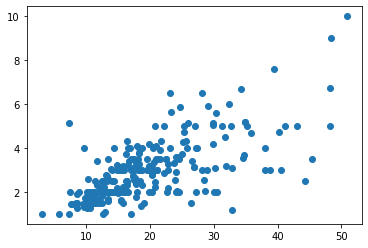

In [14]:
plt.scatter(x = tips['total_bill'] , y = tips['tip'])

<class 'matplotlib.collections.PathCollection'>


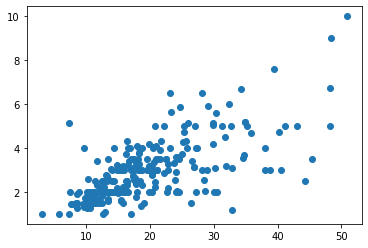

In [87]:
plot1 = plt.scatter(x = tips['total_bill'] , y = tips['tip'])
print(type(plot1))

346.0816225409836


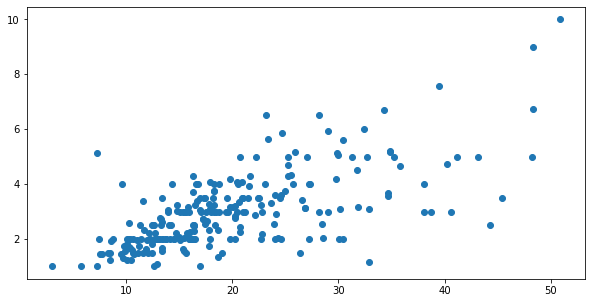

In [36]:
def plotting_function(X, y):
    # f = LinearRegression(fit_intercept = False).fit(X,y)
     mse = (mean_squared_error(X,y))
     plt.scatter(X, y)
   

plt.figure(figsize=(10, 5))
plotting_function(tips['total_bill'], tips['tip'])
plt.show()

In [61]:
#mse
data = sns.load_dataset("tips")
data.head(5)
features = data[["total_bill"]]
tip = data['tip']
f = linear_model.LinearRegression(fit_intercept = False).fit(data[['total_bill']], data['tip'])
mse = mean_squared_error(data['tip'], f.predict(data[['total_bill']]))
thetas = np.linspace(0.1, 0.2, 100)
thetas
def mse_given_theta(theta):
    return mean_squared_error(data['total_bill'] * theta, data['tip'])
mses = [mse_given_theta(theta) for theta in thetas]
print(mses)
px.line(x = thetas, y = mses)

[2.0777683729508194, 2.0366887534058913, 1.996569059699077, 1.9574092918303747, 1.919209449799786, 1.8819695336073097, 1.8456895432529465, 1.8103694787366964, 1.7760093400585586, 1.7426091272185338, 1.7101688402166224, 1.678688479052823, 1.6481680437271375, 1.6186075342395636, 1.5900069505901033, 1.5623662927787565, 1.5356855608055218, 1.5099647546704, 1.4852038743733909, 1.461402919914495, 1.4385618912937121, 1.4166807885110417, 1.3957596115664843, 1.37579836046004, 1.3567970351917082, 1.3387556357614898, 1.3216741621693837, 1.3055526144153906, 1.2903909924995107, 1.2761892964217436, 1.262947526182089, 1.2506656817805475, 1.2393437632171185, 1.2289817704918033, 1.2195797036046003, 1.2111375625555103, 1.2036553473445333, 1.197133057971669, 1.1915706944369175, 1.1869682567402793, 1.1833257448817533, 1.1806431588613406, 1.1789204986790405, 1.1781577643348538, 1.1783549558287796, 1.1795120731608182, 1.18162911633097, 1.1847060853392344, 1.1887429801856118, 1.193739800870102, 1.19969654739

In [75]:
plot2 = px.line(x = thetas, y = mses)

In [56]:
min_mse = None
theta_min = ''
for theta in thetas:
    mse = mean_squared_error(data['total_bill'] * theta, data['tip'])
    if min_mse == None:
        theta_min = theta
        min_mse = mse
    elif min_mse > mse:
        min_mse = mse
        theta_min = theta
        
print(min_mse)
print(theta_min)

1.1781577643348538
0.14343434343434344


In [77]:
#mae
mae = mean_absolute_error(data['tip'], f.predict(data[['total_bill']]))
thetas = np.linspace(0.1, 0.2, 100)
def mae_given_theta(theta):
    return mean_absolute_error(data['total_bill'] * theta, data['tip'])
maes = [mae_given_theta(theta) for theta in thetas]
print(maes)
px.line(x = thetas, y = maes)
plot3 = px.line(x = thetas, y = maes)
px.line(x = thetas, y = maes)

[1.157217213114754, 1.1432579897333994, 1.1294634459347572, 1.1160683060109289, 1.1031471684053653, 1.090654247391952, 1.078470566318927, 1.0668091571452225, 1.0555076585527405, 1.0443472429210134, 1.0331868272892861, 1.0220264116575593, 1.0109139344262295, 0.9999016393442622, 0.9888893442622949, 0.9778770491803278, 0.9669479632389468, 0.9565744328531214, 0.9465555141579731, 0.9369427885411492, 0.927434384831926, 0.9180104321907601, 0.9092026411657558, 0.9005556383507203, 0.8921851713859911, 0.8840602748799471, 0.8762963652922668, 0.8685819672131146, 0.8609771071369433, 0.8535838715019042, 0.8462932190760059, 0.8396924159629077, 0.8333600347739691, 0.8271311475409836, 0.8209073108130485, 0.8147709057791025, 0.8087909836065574, 0.8031377711541646, 0.7977234227521112, 0.7924935419771485, 0.7881639758238117, 0.7842465640006624, 0.7812624192747143, 0.7789043715846994, 0.7766898907103824, 0.7746840536512667, 0.7729427471435669, 0.7717921013412816, 0.7710117983109788, 0.7706171551581389, 0.7

In [62]:
min_mae = None
theta_min = ''
for theta in thetas:
    mae = mean_absolute_error(data['total_bill'] * theta, data['tip'])
    if min_mae == None:
        theta_min = theta
        min_mae = mae
    elif min_mae > mae:
        min_mae = mae
        theta_min = theta
        
print(min_mae)
print(theta_min)

0.7706171551581389
0.14949494949494951


In [64]:
# huber loss
def huber_loss(theta, delta = 1.5):
    y_predicted = theta * X
    y_error = np.abs(y - y_predicted)
    return sum(np.where(y_error <= delta, ((y_error)**2)/2, delta * (y_error - (delta / 2))))



minimum_theta = minimize(huber_loss, x0 = .5)
theta_huber = minimum_theta.x[0]
print(minimum_theta)
print(theta_huber)

      fun: 126.1752379831355
 hess_inv: array([[1.265877e-05]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([0.14626753])
0.14626752601211537


In [70]:
# huber loss 
# huber loss
def huber_loss(theta, delta = 1.5):
    y_predicted = theta * X
    y_error = np.abs(y - y_predicted)
    return np.mean(np.where(y_error <= delta, ((y_error)**2)/2, delta * (y_error - (delta / 2))))



minimum_theta = minimize(huber_loss, x0 = .5)
theta_huber = minimum_theta.x[0]
print(minimum_theta)
print(theta_huber)



      fun: 0.5171116310784242
 hess_inv: array([[0.00308874]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([0.14626753])
0.14626752597928258


In [68]:
hubers = [huber_loss(theta) for theta in thetas]

In [79]:
px.line(x = thetas, y = hubers)
plot4 = px.line(x = thetas, y = hubers)
px.line(x = thetas, y = hubers)

In [72]:
px.line(x = thetas, y = hubers)
px.line(x = thetas, y = mses)
px.line(x = thetas, y = maes)

In [73]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= thetas, y= hubers, name="Huber", mode="lines"))
fig.add_trace(go.Scatter(x=thetas, y= mses, name="MSE", mode="lines"))
fig.add_trace(go.Scatter(x=thetas, y= maes, name="MAE", mode="lines"))
fig.update_layout(
    title="Loss Functions", xaxis_title="Thetas", yaxis_title="Mean Loss"
)
fig.show()

In [121]:
def display_plots(x, y1, y2, y3):
    fig, (ax1, ax2, ax3,ax4) = plt.subplots(4,1)
    ax4.scatter(tips['total_bill'], tips['tip'])
    ax1.plot(x, y1)
    ax2.plot(x, y2)
    ax3.plot(x, y3)
   
    


In [166]:
def display_plots2(x, y1, y2, y3):
    fig, ax = plt.subplots(2,2, figsize = (10,5))
    ax[0,0].scatter(tips['total_bill'], tips['tip'])
    ax[0,1].plot(x, y1)
    ax[1,0].plot(x, y2)
    ax[1,1].plot(x, y3)

In [198]:
## Accepts thetas(points on x axis), y(actual), x(actual)....will calculate y(predicted)
## produes mses, maes, and huberlosses
def huber_loss(theta, delta = 1.5):
    y_predicted = theta * X
    y_error = np.abs(y - y_predicted)
    return np.mean(np.where(y_error <= delta, ((y_error)**2)/2, delta * (y_error - (delta / 2))))

def display_plots3(df, X, y, x_start, x_end, delta = 1.5):
    # data = df
    # features = X
    # actual = y
    f = linear_model.LinearRegression(fit_intercept = False).fit(X, y)
    thetas = np.linspace(x_start, x_end, 100)
    mses = [mean_squared_error(X*theta, y) for theta in thetas]
    # print(mses)
    maes = [mean_absolute_error(X*theta, y) for theta in thetas]
    # print(maes)
    hubers = [huber_loss(theta) for theta in thetas]
    # print(hubers)
    
    fig, ax = plt.subplots(2,2, figsize = (10,5))
    fig.suptitle('Loss Plots')
    ax[0,0].scatter(X, y)
    ax[0,0].set_title('Plotting Tips')
    ax[0,1].plot(thetas, mses)
    ax[0,1].set_title('MSES')
    ax[1,0].plot(thetas, maes)
    ax[1,0].set_title('MAES')
    ax[1,1].plot(thetas, hubers)
    ax[1,1].set_title('Huber Loss')
    for ax in ax.flat:
            ax.set(xlabel = 'Thetas', ylabel = "Loss")
    fig.tight_layout()
    

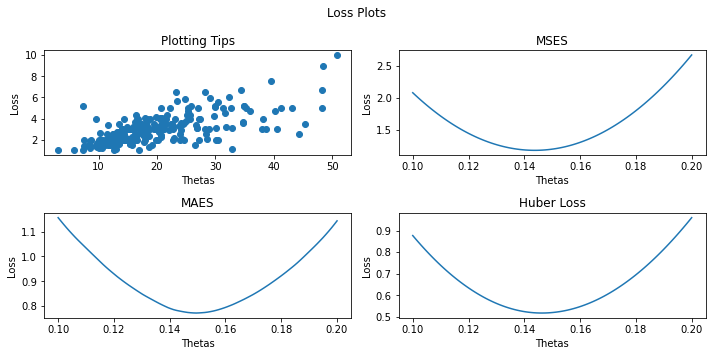

In [199]:
display_plots3(data, data[['total_bill']], data['tip'], 0.1, 0.2)

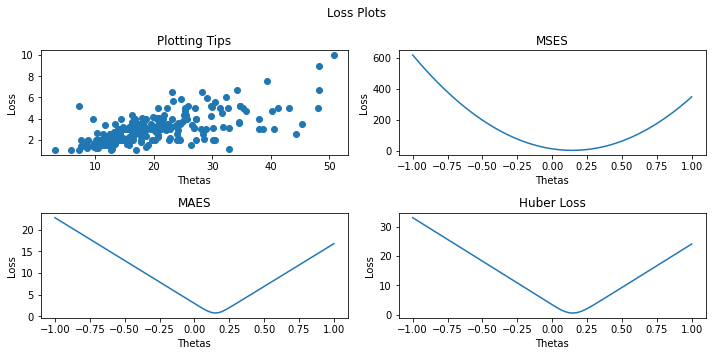

In [200]:
display_plots3(data, data[['total_bill']], data['tip'], -1, 1)

In [ ]:
# huber loss
def huber_loss(theta, delta = 1.5):
    y_predicted = theta * X
    y_error = np.abs(y - y_predicted)
    return mean(np.where(y_error <= delta, ((y_error)**2)/2, delta * (y_error - (delta / 2))))



minimum_theta = minimize(huber_loss, x0 = .5)
theta_huber = minimum_theta.x[0]
print(minimum_theta)
print(theta_huber)
hubers = [huber_loss(theta) for theta in thetas]

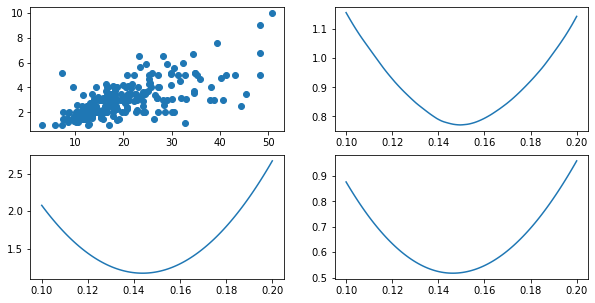

In [165]:
display_plots2(thetas, maes, mses, hubers)

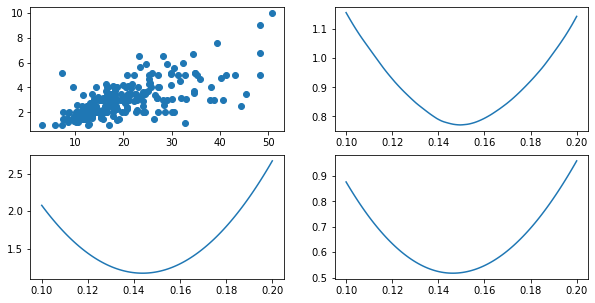

In [164]:
display_plots2(thetas, maes, mses, hubers)

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# an example graph type
def fig_barh(ylabels, xvalues, title=''):
    # create a new figure
    fig = plt.figure()

    # plot to it
    yvalues = 0.1 + np.arange(len(ylabels))
    plt.barh(yvalues, xvalues, figure=fig)
    yvalues += 0.4
    plt.yticks(yvalues, ylabels, figure=fig)
    if title:
        plt.title(title, figure=fig)

    # return it
    return fig

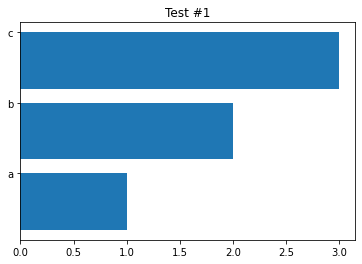

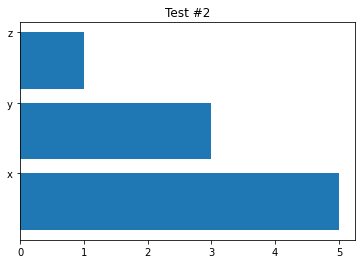

In [89]:
from matplotlib.backends.backend_pdf import PdfPages

def write_pdf(fname, figures):
    doc = PdfPages(fname)
    for fig in figures:
        fig.savefig(doc, format='pdf')
    doc.close()

def main():
    a = fig_barh(['a','b','c'], [1, 2, 3], 'Test #1')
    b = fig_barh(['x','y','z'], [5, 3, 1], 'Test #2')
    write_pdf('test.pdf', [a, b])

if __name__=="__main__":
    main()

In [90]:
print(type(a))

NameError: name 'a' is not defined